Notebook to test the reimplementation of the Compton subtraction method, including helper functions. Written 20190708


In [9]:
%load_ext autoreload
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import ompy as om

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test the compton subtraction method

In [16]:
raw = ompy.example_raw("Si28")

FWHM = 2.7
folderpath = "../../oscar2017_scale1.15"
response, response_tab = om.interpolate_response(folderpath, raw.Eg, FWHM, return_table=True)

# Without compton subtraction
unfolder = om.Unfolder(response=response)
unfolder.use_compton_subtraction = False
unfolded = unfolder(raw)

# With compton subtraction
unfolder = om.Unfolder(response=response)
unfolder.use_compton_subtraction = True
unfolder.response_tab = response_tab
unfolded_cmp = unfolder(raw)

Note: The response below 200 keV is interpolation only, as there are no simulations available.


<IPython.core.display.Javascript object>


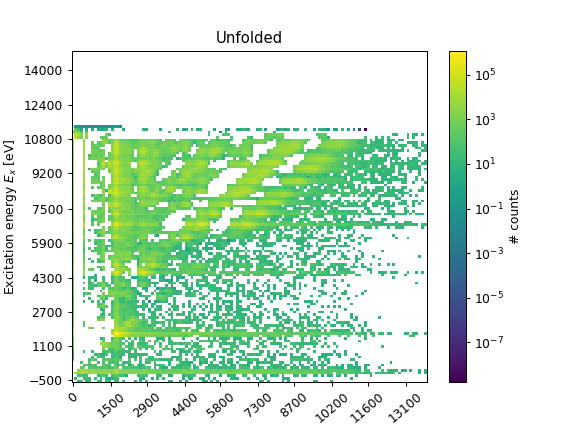

<IPython.core.display.Javascript object>


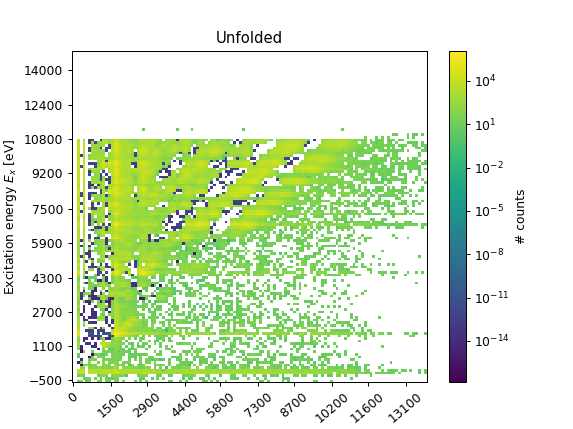

In [17]:
unfolded.plot()
unfolded_cmp.plot()
plt.show()

../../ompy/unfold.py:369: RuntimeWarning: invalid value encountered in true_divide
  fluctuations_matrix = fluctuations_matrix/fluctuations_vector_raw[:,None] # TODO check that this broadcasts the vector over the right dimension


DEBUG: Running Compton subtraction method.


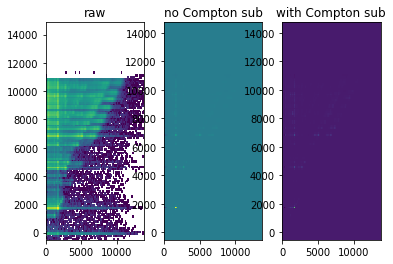

In [5]:
# Run unfolding without Compton subtraction:
unfolded_no_compton = unfolder.unfold(raw, use_comptonsubtraction=False)

# Run unfolding again WITH Compton subtraction:
unfolded_with_compton = unfolder.unfold(raw, FWHM_factor=10, use_comptonsubtraction=True)


# Plot:
f, (ax0, ax1, ax2) = plt.subplots(1, 3)

# Plot raw:
raw.plot(ax=ax0, title="raw")

# Plot unfolded without Compton subtraction method:
unfolded_no_compton.plot(ax=ax1, zscale="linear", title="no Compton sub")

# Plot unfolded with Compton subtraction method:
unfolded_with_compton.plot(ax=ax2, zscale="linear", title="with Compton sub")

#f.set_size_inches(15, 5)

<IPython.core.display.Javascript object>


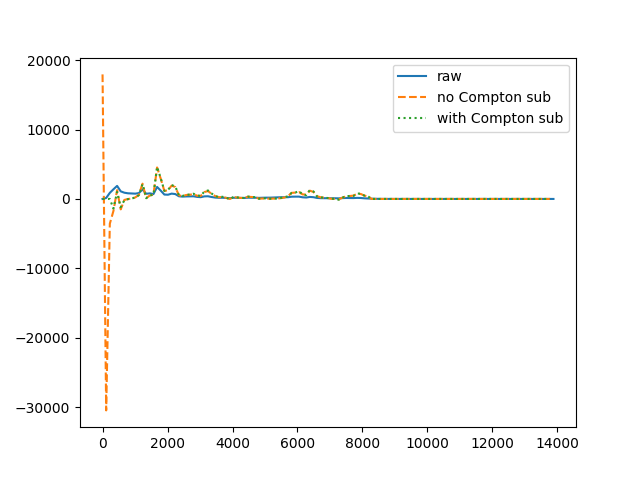

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [6]:
# Plot projections:
E_limits = [8000, 8200]

# Plot:
f, ax0 = plt.subplots(1)

# Plot raw:
raw.plot_projection_x(E_limits, ax=ax0, label="raw", linestyle="-")

# Plot unfolded without Compton subtraction method:
unfolded_no_compton.plot_projection_x(E_limits, ax=ax0, label="no Compton sub", linestyle="--")

# Plot unfolded with Compton subtraction method:
unfolded_with_compton.plot_projection_x(E_limits, ax=ax0, label="with Compton sub", linestyle=":")

ax0.legend()
ax1.legend()
ax2.legend()

#f.set_size_inches(15, 5)